In [19]:
import torch
import torchvision
from torchvision import datasets 
import torchvision.transforms  as T
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch import nn 


In [20]:
Data_cifar = torchvision.datasets.CIFAR10 (
    
    root='./DATASET/', # donde queremos descargar 
    train=True, 
    #download=True,
    transform= T.Compose([T.ToTensor() ,T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ] ) #
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5870366..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.370448..2.2710083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.1804092].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1769934..2.1134453].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].
Clipping

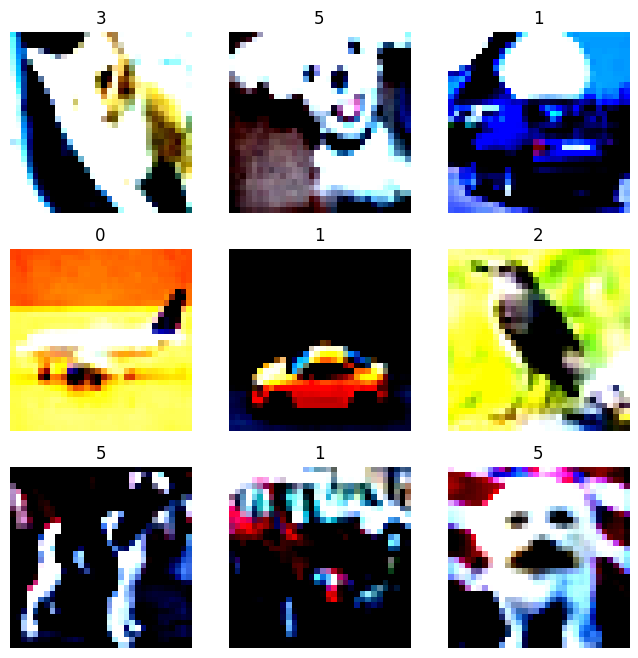

In [21]:
# observamos el algunos ejemplos del set de datos 

plot = plt.figure(figsize=(8,8))
fila , columna = 3 ,3 

for i in range(1 , columna * fila + 1 ):
    pick = torch.randint(len(Data_cifar), size=(1,)).item()
    
    imgaen , label = Data_cifar[pick]
    
    plot.add_subplot(fila,columna,i)
    plt.title(str(label))
    plt.axis('off')
    plt.imshow(imgaen.permute(1, 2, 0))
plt.show()

In [22]:
print(len(Data_cifar))

50000


In [23]:
##Para deividir el set de entrenamiento usaremos usaremos Prueba , validacion , entrenamiento = random_split() dentro de ( pondremos el data set y los procentajes  )


entrenamiento , validacion , prueba = torch.utils.data.random_split( Data_cifar , [0.8 , 0.1 , 0.1] )


print(len(entrenamiento))
print(len(validacion))
print(len(prueba))

train_loader = DataLoader( 
    dataset=entrenamiento,                          
    batch_size=32,                      
    shuffle=True                       
                          )

val_loader = DataLoader(
    dataset=validacion,
    batch_size=32,
    shuffle=True  
)

prueba_loader = DataLoader( 
        dataset=prueba,  
        batch_size=32,                            
        shuffle=True    
                            )



40000
5000
5000


In [ ]:
class Redneuronal(nn.Module): ## al escribir nn.module estamos diciendo que la clase redneuronal es hija de module
    ## estas 2 lineas de abajo siempre iran ya que son estandar de torch para hacer funcionar la red y inicializar el modelo
    def __init__(self):
        super().__init__() 
        #Ahora si modemos crear la arquitectura 
        
        self.aplanar = nn.Flatten() # transforma el tensor de (1x28x28) en un vector de (1 , 784)
        self.red = nn.Sequential( #Esto en torch es una forma de defininir un patron que indica una secuencia de capas aplicadas en el orden dado
            
            nn.Linear(32*32*3 , 100), ##Primero se define la capa de entrada + con cuantas neuronas se va a conectar (capa oculta)
            nn.ReLU(), ##Aunque arriba hayamos definido la cantidad de neuronas de la capa oculta nos falta definir su funcion de activacion
            nn.Linear(100,50), ## Decimos la capa de salida conectada con las 15 neuronas de la capa oculta 
            nn.ReLU(),
            nn.Linear(50,10),
        )
        
        
    def forward(self , x ): # X hace referencia al dato de entrada y la secuancia que va a tomar
        x = self.aplanar(x)
        output = self.red(x)

        return output


In [41]:
canal1 = 16 
canal2 = 32 

epocas = 10 

class arquitectura_cnn(nn.Module): 

    def __init__(self):
        super().__init__() 
       
        
        self.red = nn.Sequential( 
                nn.Conv2d(in_channels=3 , out_channels=canal1 , kernel_size=3 , padding=1) ,nn.LeakyReLU(),
                nn.Conv2d(in_channels=canal1 , out_channels=canal2 , kernel_size=3 , padding=1) ,nn.LeakyReLU(),
                nn.MaxPool2d(2,2) , 
                nn.Conv2d(in_channels=canal2 , out_channels=64 , kernel_size=3 , padding=1),nn.LeakyReLU(),
                nn.Conv2d(in_channels=64 , out_channels=256 , kernel_size=3 , padding=1),nn.ReLU(),
                nn.MaxPool2d(2,2) , 
                nn.Flatten(),
                
                nn.Linear(in_features=8*8*256 , out_features=256) , nn.ReLU() ,
                nn.Linear( in_features=256 ,  out_features=10)
                                 
        )
          
    def forward(self , x ): 

        y = self.red(x)

        return y


In [42]:
Modelo = arquitectura_cnn().to('cuda')
Modelo

Parametros = sum(p.numel() for p in Modelo.parameters()) #p.numel() accede a la cantidad de perametros por capa si itera y se suma
print(f'La cantida de parametros es de  {Parametros}')
print(Modelo)

La cantida de parametros es de  4368426
arquitectura_cnn(
  (red): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): LeakyReLU(negative_slope=0.01)
    (7): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=16384, out_features=256, bias=True)
    (12): ReLU()
    (13): Linear(in_features=256, out_features=10, bias=True)
  )
)


Hiperparametros 


In [43]:
learning_rate = 0.0001
Epochs = 15
fun_perdida = nn.CrossEntropyLoss()
optimizador = torch.optim.Adam(Modelo.parameters() , lr = learning_rate)

In [28]:
def entrenamiento_loop(data_loader, modelo, fun_perdida, optimizador): 
    train_size = len(data_loader.dataset)
    nlotes = len(data_loader)
    modelo.train()
    
    perdida, accuracy = 0, 0
    
    for batch_idx, (x, y) in enumerate(data_loader):
        x, y = x.to("cuda"), y.to('cuda')
        # forward
        probabilidad = modelo(x)
        # backward
        loss = fun_perdida(probabilidad, y)
        loss.backward()
        optimizador.step()
        optimizador.zero_grad()
    
        perdida += loss.item()
        accuracy += (probabilidad.argmax(1) == y).type(torch.float).sum().item()
        
        # Corrección: mostrar progreso cada 10 lotes
        if batch_idx % 10 == 0: 
            current_loss = loss.item()
            processed_samples = (batch_idx + 1) * len(x)
            print(f'\tPerdida: {current_loss:>7f} [{processed_samples:>5d}/{train_size:>5d}]')
    
    perdida /= nlotes
    accuracy /= train_size
    print(f'\t Exactitud/perdida promedio:')
    print(f'\t\t entrenamiento: {(100*accuracy):>0.2f}% / {perdida:>8f}')  # Aumentar precisión

In [29]:
def val_loop(data_loader, modelo, fun_perdida): 
    val_size = len(data_loader.dataset)
    nlotes = len(data_loader)
    
    modelo.eval()
    
    perdida_val, accuracy = 0, 0
    
    with torch.no_grad():
        for X, y in data_loader: 
            X, y = X.to('cuda'), y.to('cuda')
            
            probabilidad = modelo(X)
            
            perdida_val += fun_perdida(probabilidad, y).item()
            accuracy += (probabilidad.argmax(1) == y).type(torch.float).sum().item()
            
    perdida_val /= nlotes
    accuracy /= val_size
    
    print(f'\t\tValidacion: {(100*accuracy):>0.2f}% / {perdida_val:>8f} \n')

In [44]:
for i in range(Epochs):
    print(f'Epoca = {i+1} de {Epochs}')
    
    entrenamiento_loop(train_loader, Modelo, fun_perdida, optimizador)
    
    val_loop(val_loader, Modelo, fun_perdida)
    
print('listo')

Epoca = 1 de 15
	Perdida: 2.302272 [   32/40000]
	Perdida: 2.305209 [  352/40000]
	Perdida: 2.286144 [  672/40000]
	Perdida: 2.241741 [  992/40000]
	Perdida: 2.142856 [ 1312/40000]
	Perdida: 2.071888 [ 1632/40000]
	Perdida: 2.190210 [ 1952/40000]
	Perdida: 1.956141 [ 2272/40000]
	Perdida: 2.049220 [ 2592/40000]
	Perdida: 1.961074 [ 2912/40000]
	Perdida: 1.934950 [ 3232/40000]
	Perdida: 1.863261 [ 3552/40000]
	Perdida: 1.685209 [ 3872/40000]
	Perdida: 1.922810 [ 4192/40000]
	Perdida: 1.749402 [ 4512/40000]
	Perdida: 1.920776 [ 4832/40000]
	Perdida: 1.843942 [ 5152/40000]
	Perdida: 1.959920 [ 5472/40000]
	Perdida: 1.841485 [ 5792/40000]
	Perdida: 1.946552 [ 6112/40000]
	Perdida: 1.810376 [ 6432/40000]
	Perdida: 1.674610 [ 6752/40000]
	Perdida: 1.819594 [ 7072/40000]
	Perdida: 1.950469 [ 7392/40000]
	Perdida: 1.588260 [ 7712/40000]
	Perdida: 1.908906 [ 8032/40000]
	Perdida: 1.755305 [ 8352/40000]
	Perdida: 1.762706 [ 8672/40000]
	Perdida: 1.558558 [ 8992/40000]
	Perdida: 1.851011 [ 9312/4